In [ ]:
# Problem: spam email detection

In [ ]:
# data comes from https://archive.ics.uci.edu/dataset/94/spambase

In [1]:
import numpy as np
import pandas as pd

# Load the Spambase dataset
data = pd.read_csv('spambase.data')

# Fill missing values with the mean of each column
data = data.fillna(data.mean())

column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'spam'
]

# Assign column names to the dataset
data.columns = column_names

In [2]:
# random forest 定义要删除的所有特征的大列表
features_to_drop = [
    'word_freq_labs', 'word_freq_credit', 'word_freq_make',
    'word_freq_address', 'word_freq_order', 'word_freq_technology',
    'char_freq_#', 'word_freq_pm', 'word_freq_people', 'word_freq_85',
    'word_freq_data', 'word_freq_font', 'char_freq_[', 'word_freq_report',
    'word_freq_project', 'word_freq_lab', 'word_freq_telnet', 'word_freq_original',
    'word_freq_conference', 'word_freq_cs', 'word_freq_direct', 'word_freq_addresses',
    'word_freq_3d', 'word_freq_857', 'word_freq_415', 'word_freq_parts', 'word_freq_table',
    'word_freq_edu', 'word_freq_hpl', 'word_freq_1999', 'char_freq_(',
    'word_freq_internet', 'word_freq_will', 'word_freq_all', 'word_freq_business',
    'word_freq_re', 'word_freq_email', 'word_freq_mail', 'word_freq_receive',
    'word_freq_over', 'word_freq_650', 'word_freq_meeting', 'char_freq_;'
]

# Create a copy of the dataset
data_copy = data.copy()

# Remove the specified features from the copied dataset
data_copy = data_copy.drop(features_to_drop, axis=1)

In [6]:
data.spam.value_counts()

0    2788
1    1812
Name: spam, dtype: int64

In [21]:
# Perform statistical analysis
#statistics = data.describe()
#print(statistics)

C:\Users\dell\AppData\Local\Temp\ipykernel_25028\1033374730.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 6))


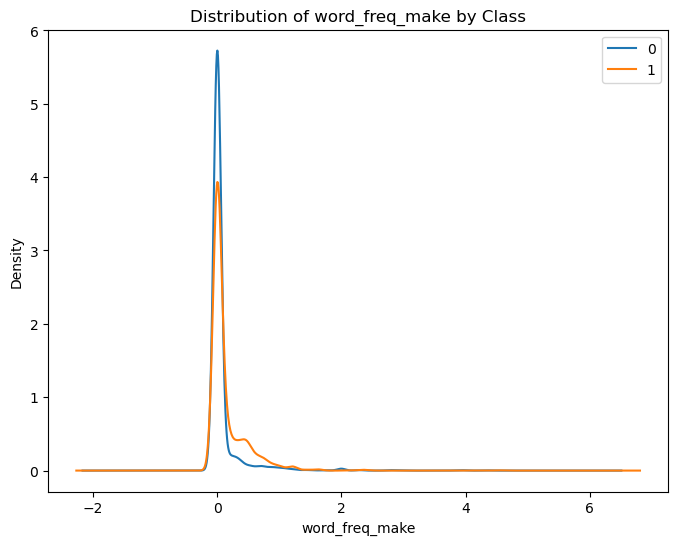

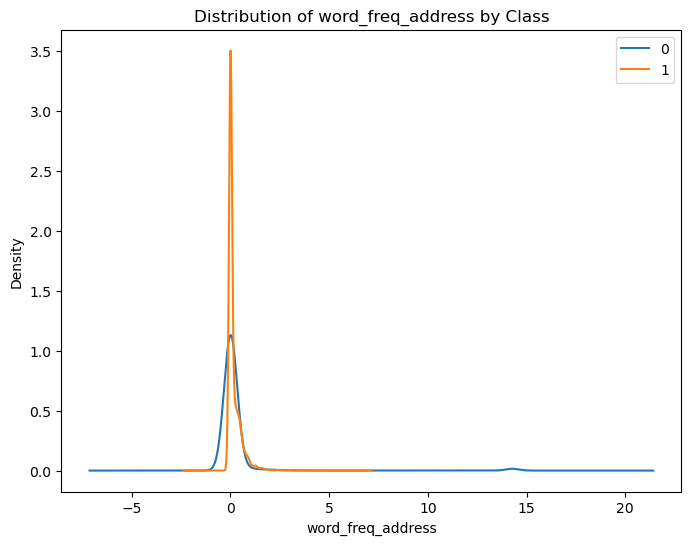

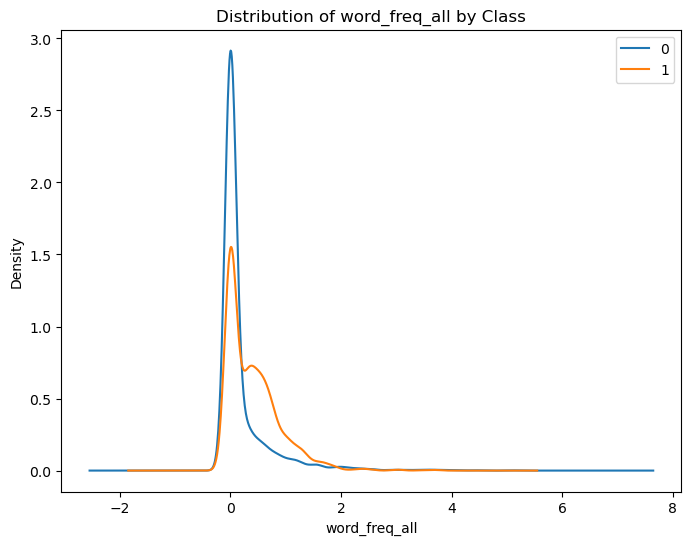

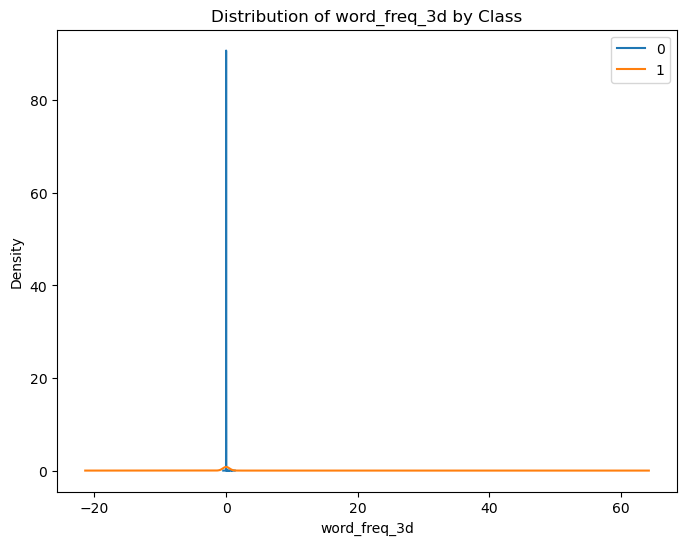

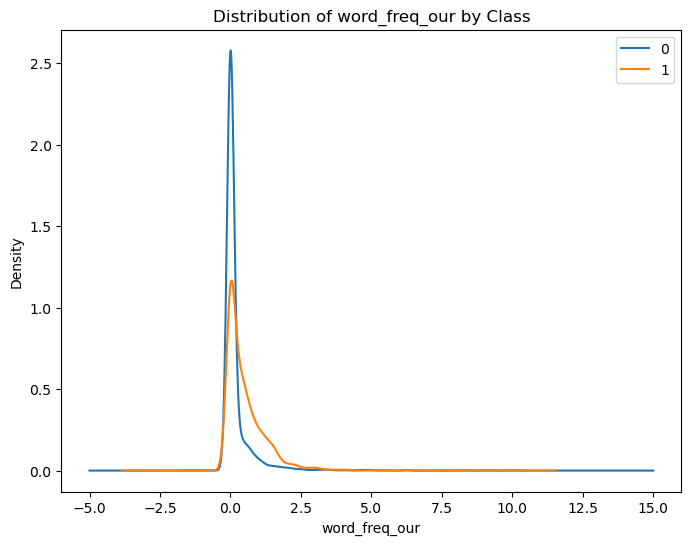

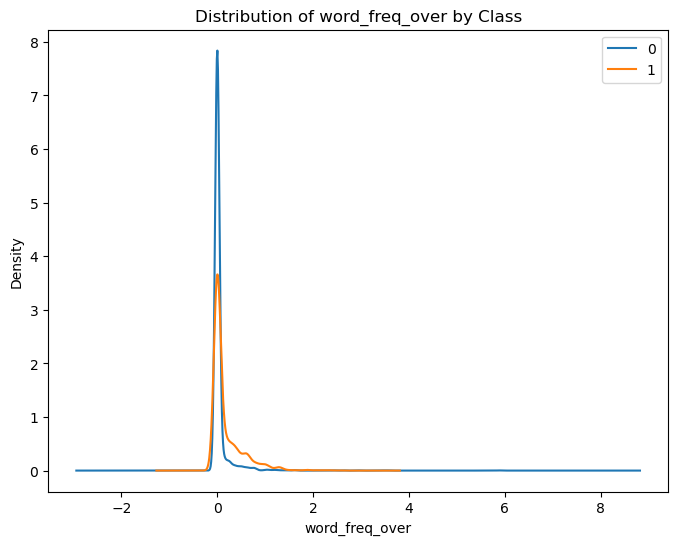

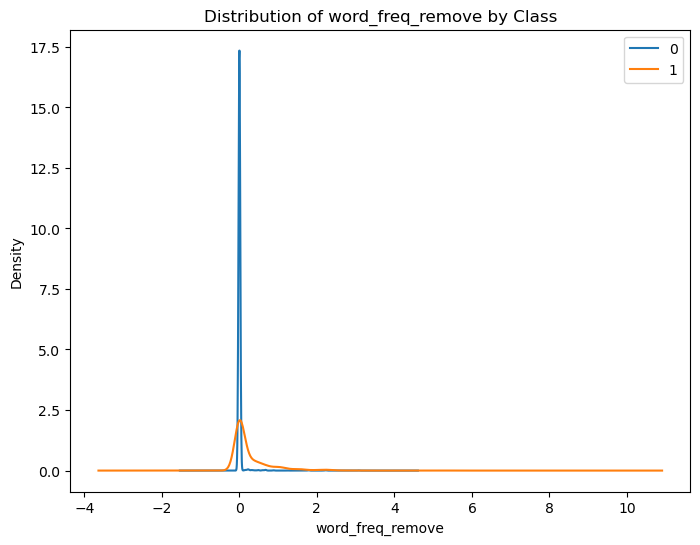

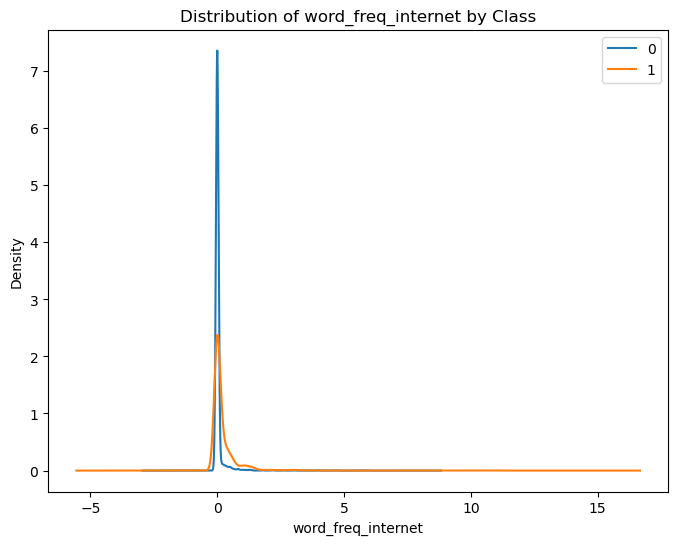

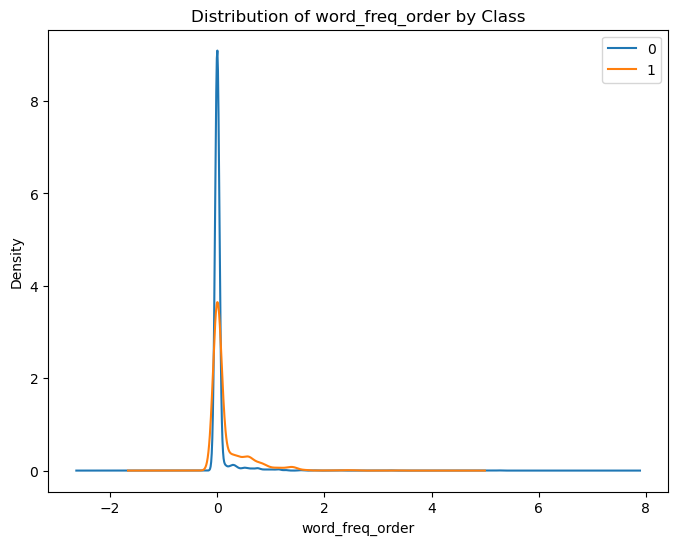

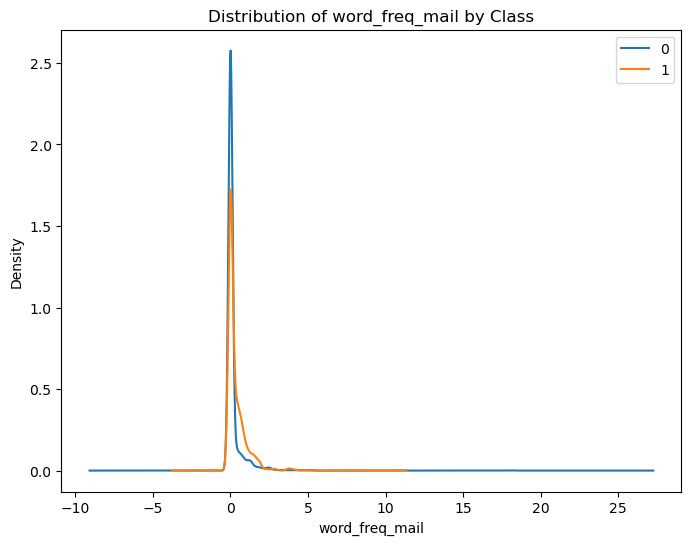

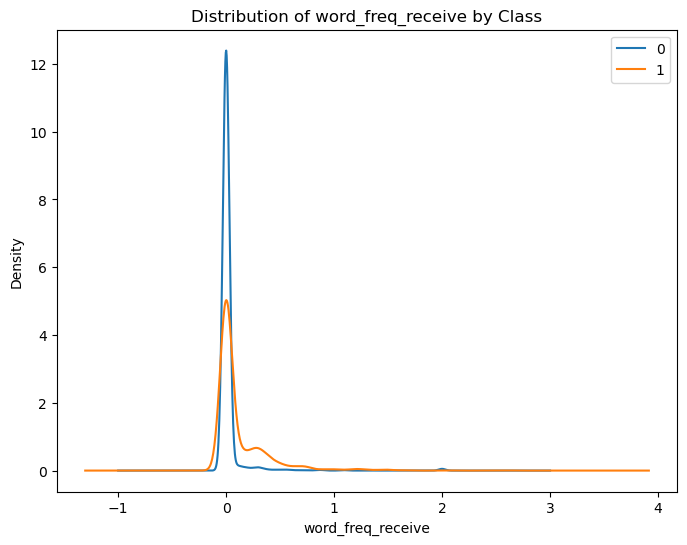

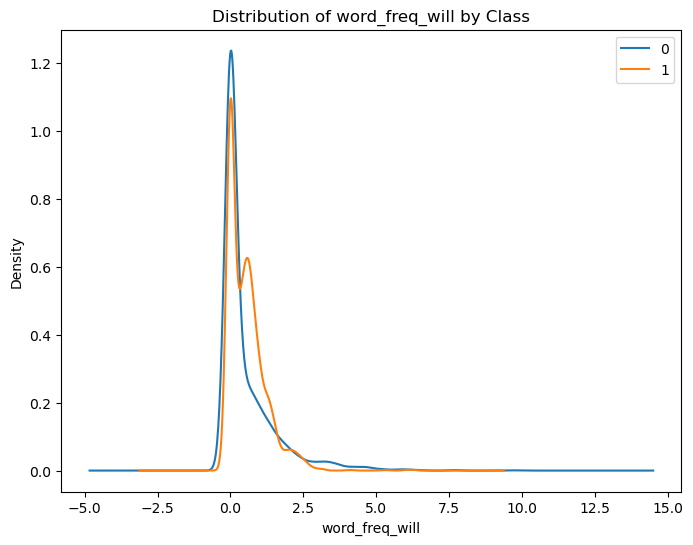

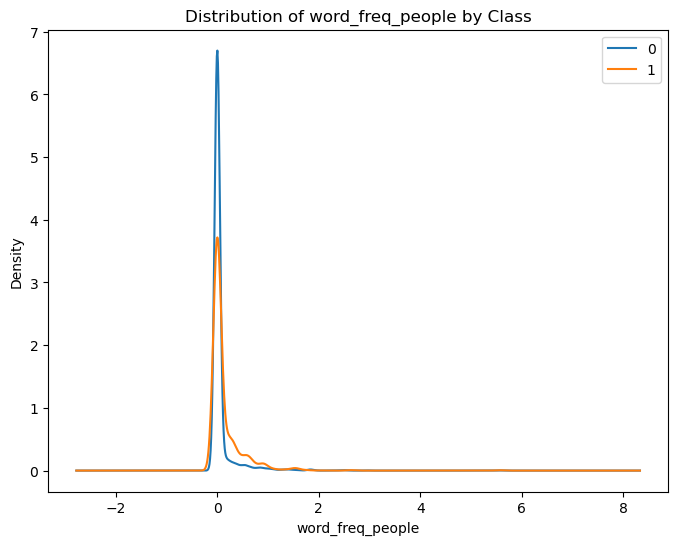

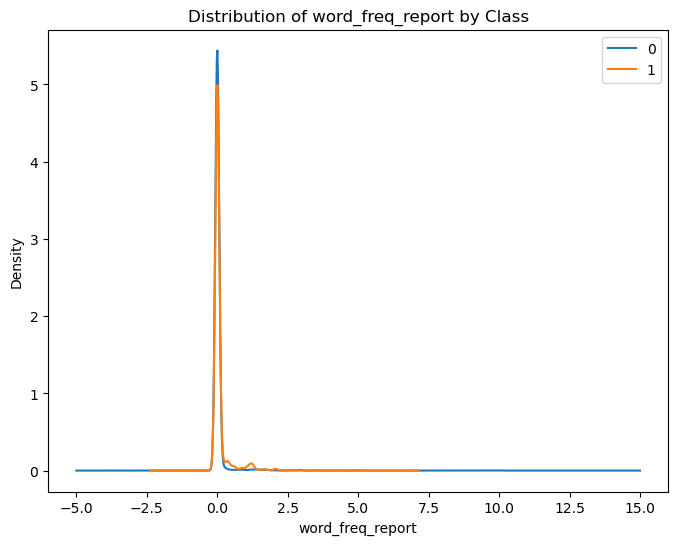

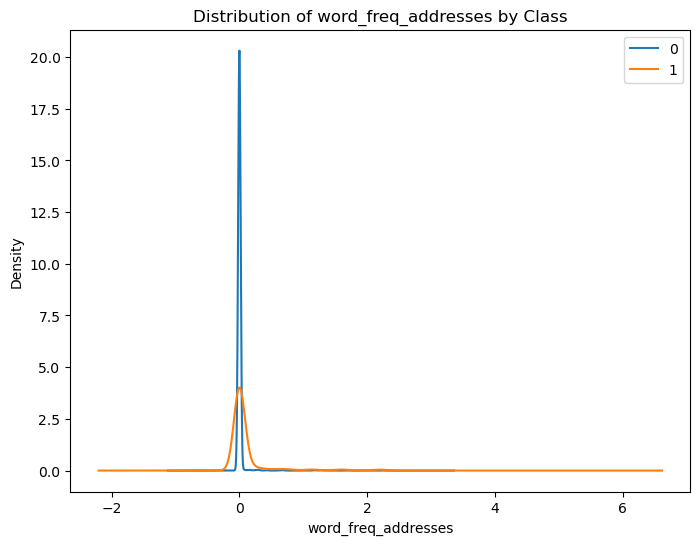

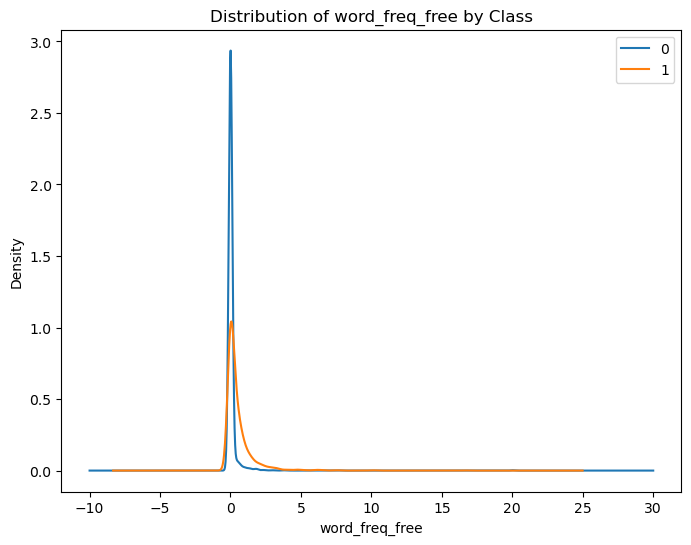

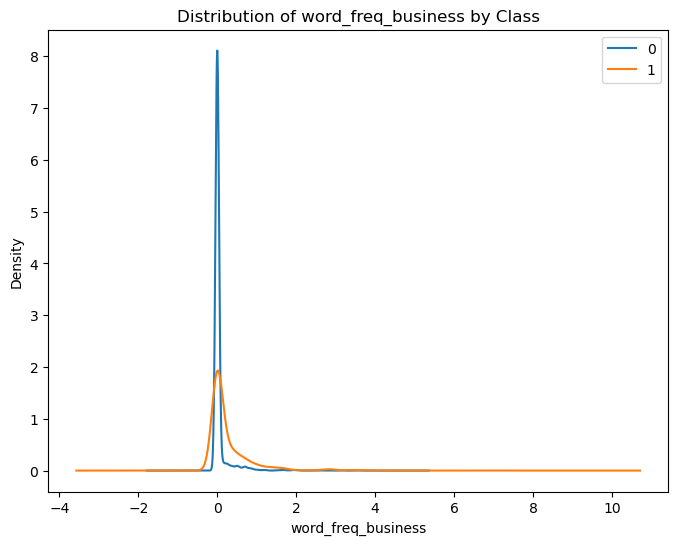

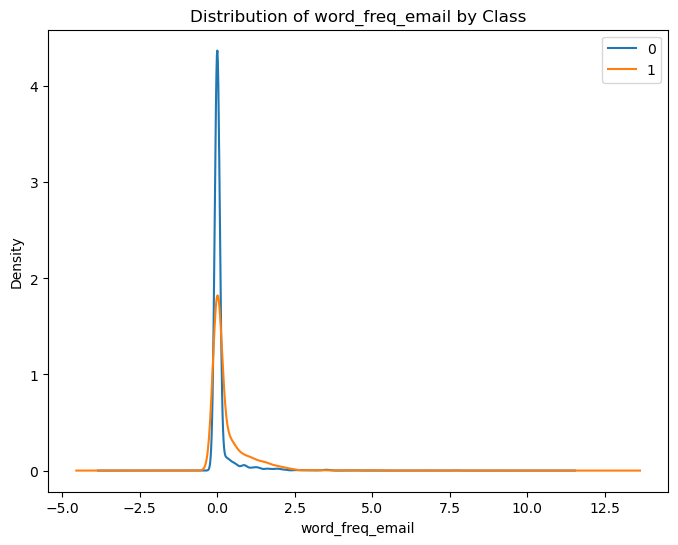

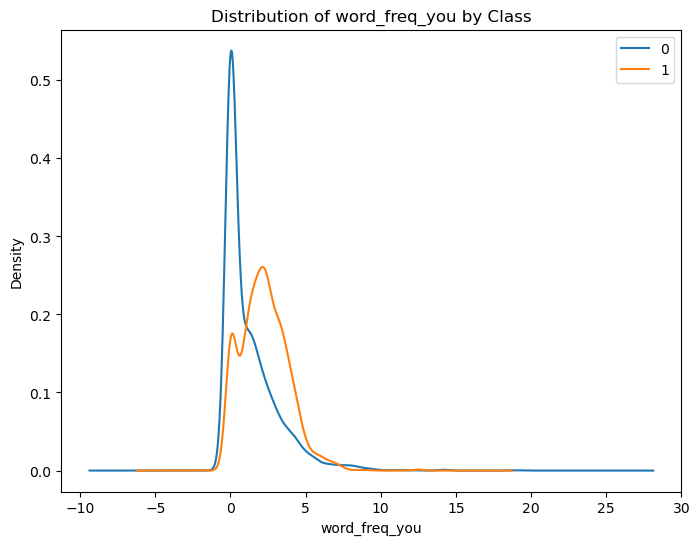

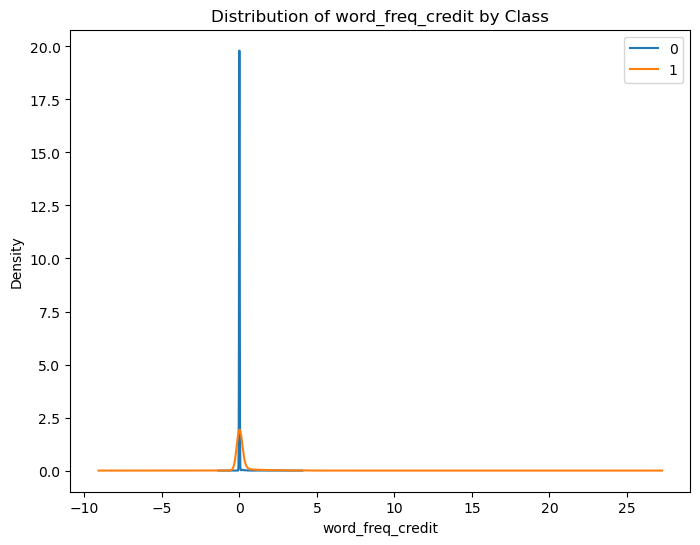

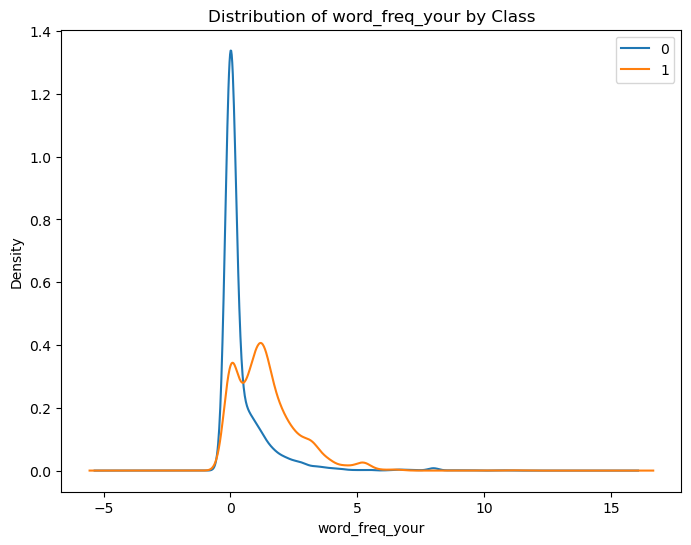

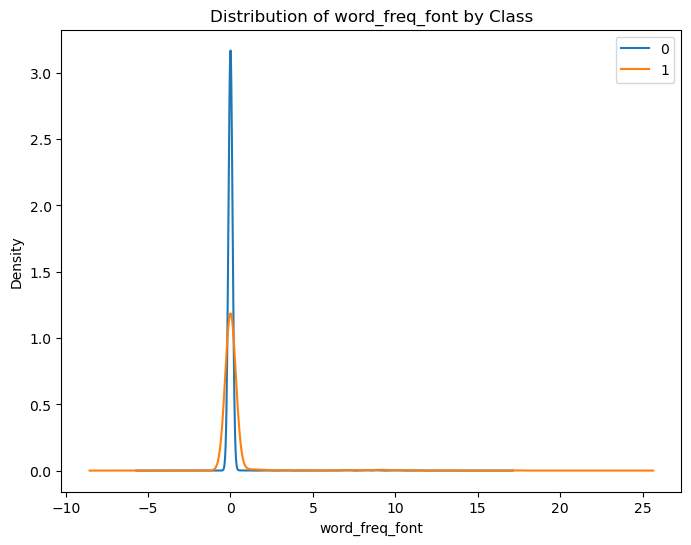

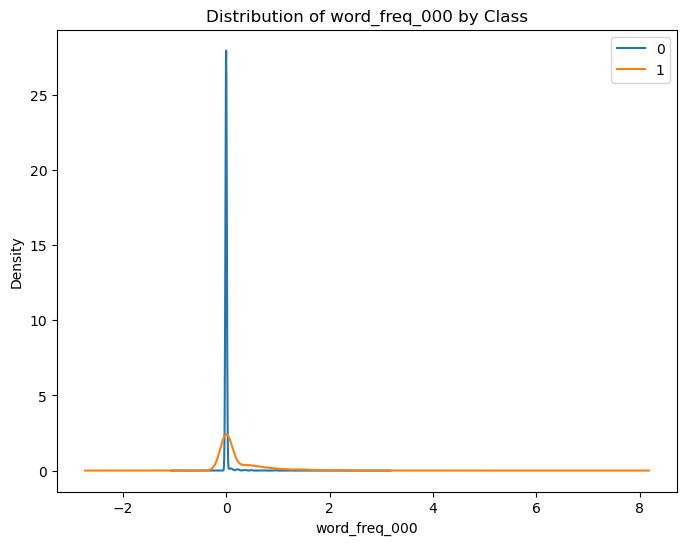

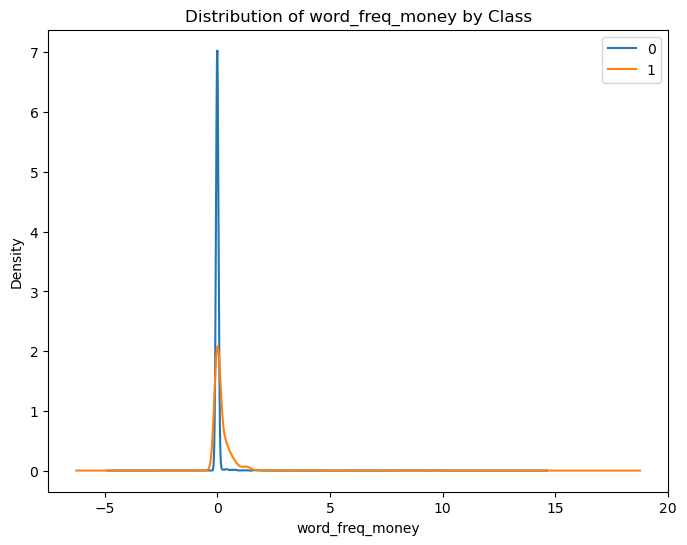

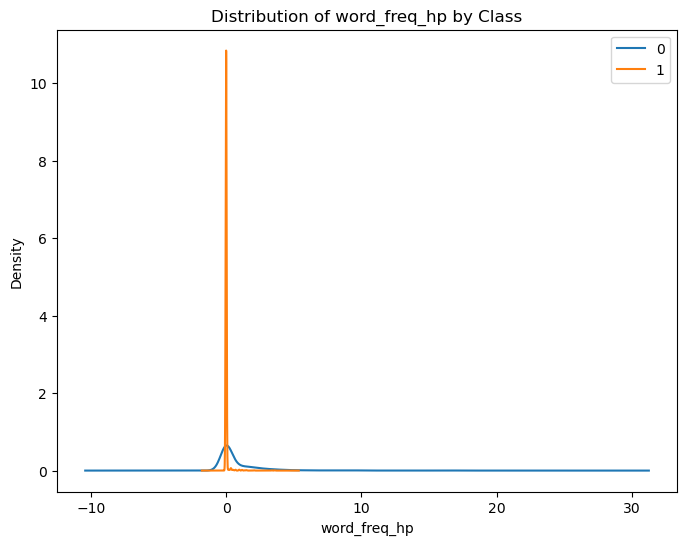

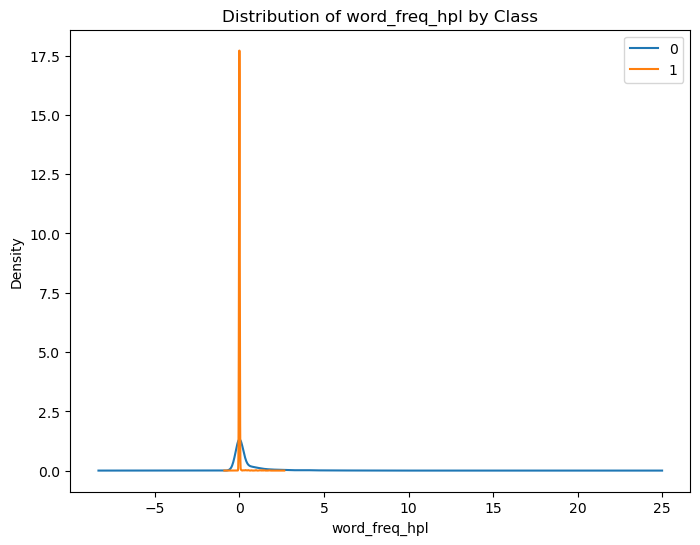

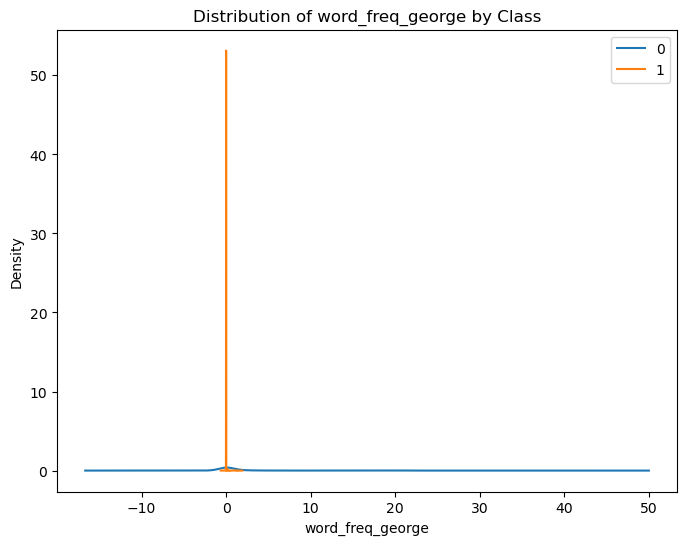

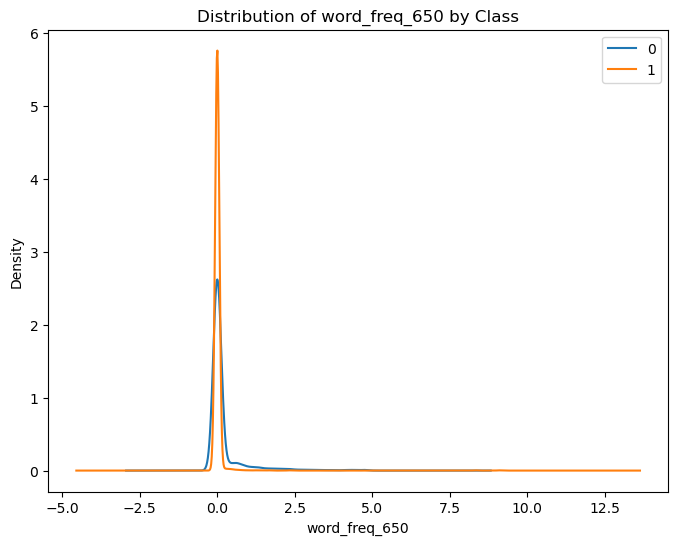

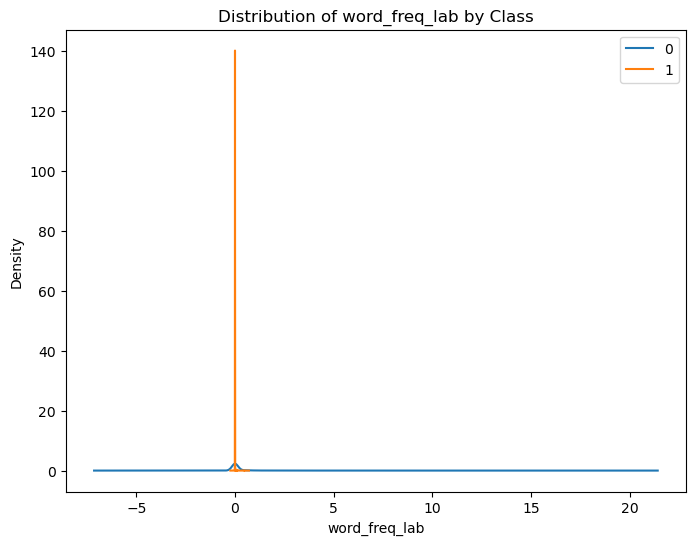

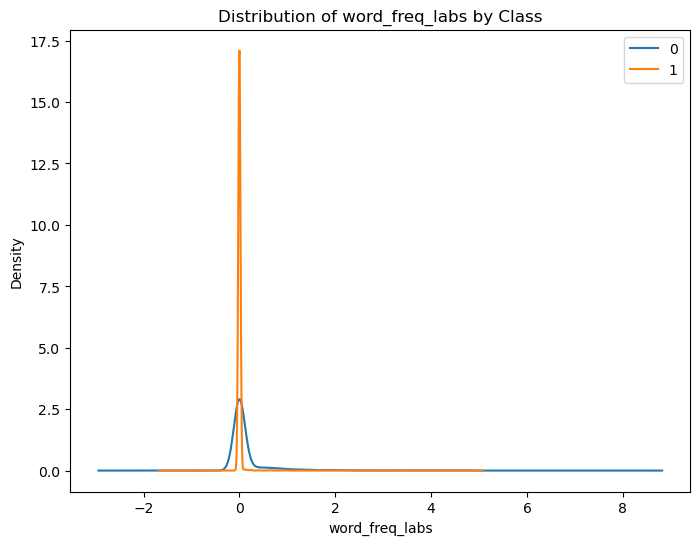

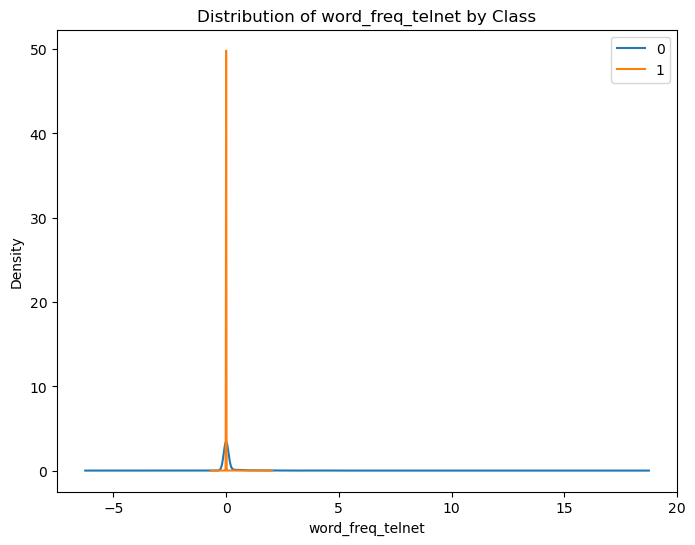

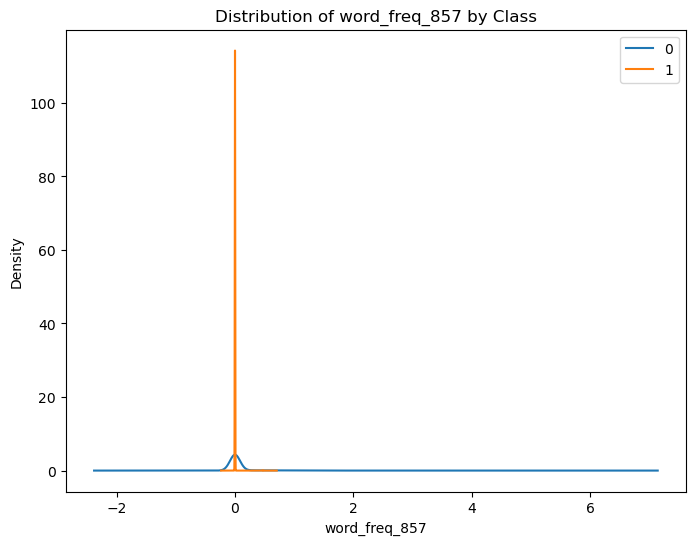

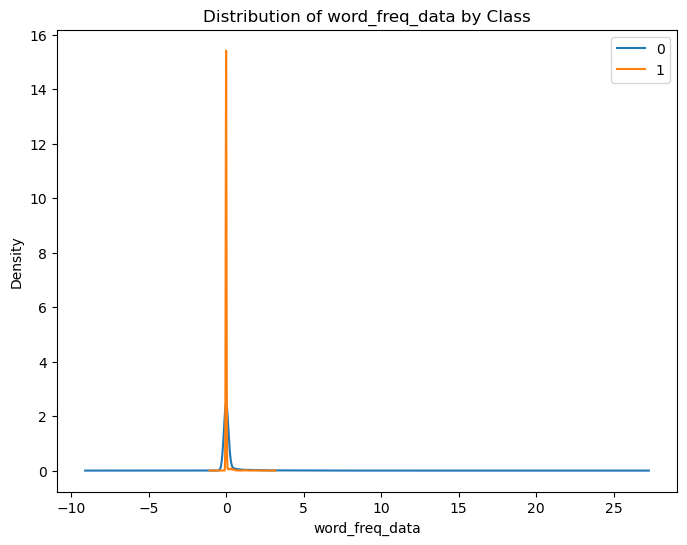

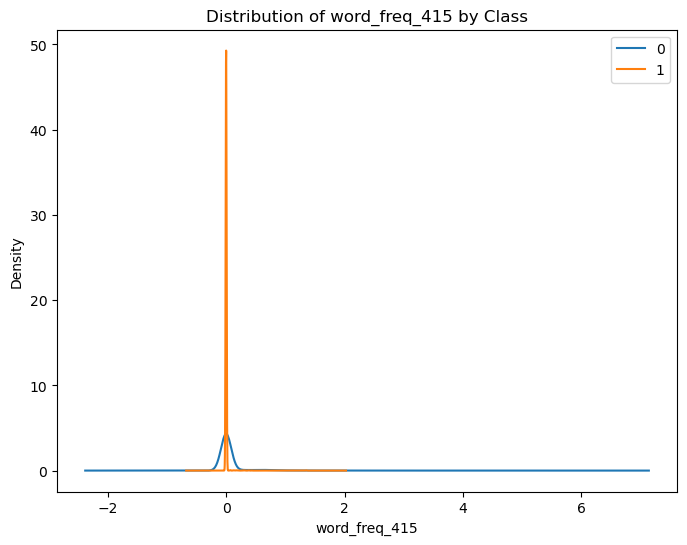

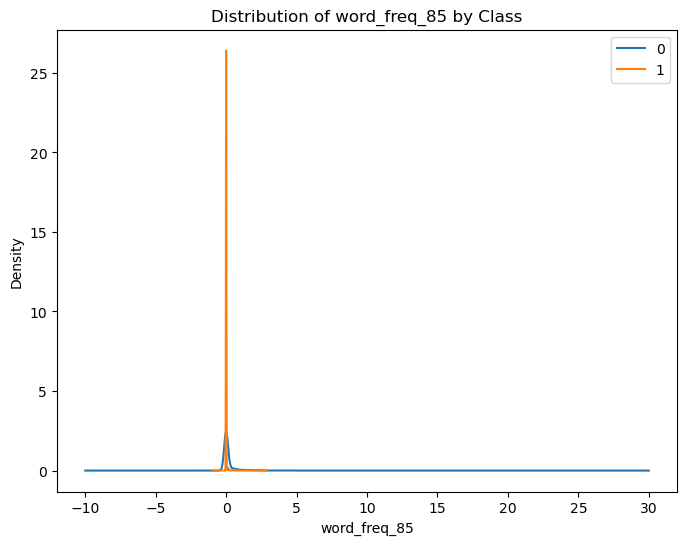

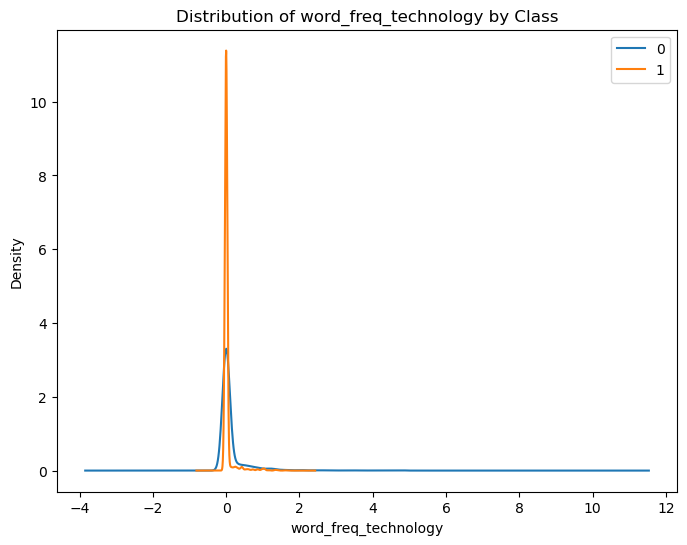

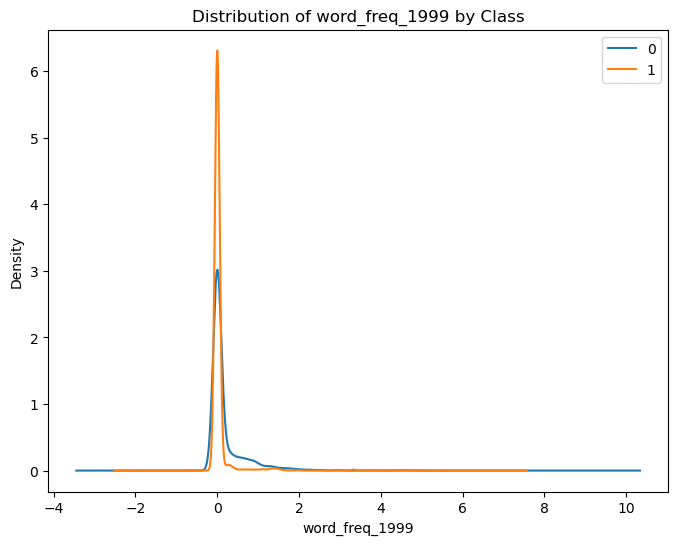

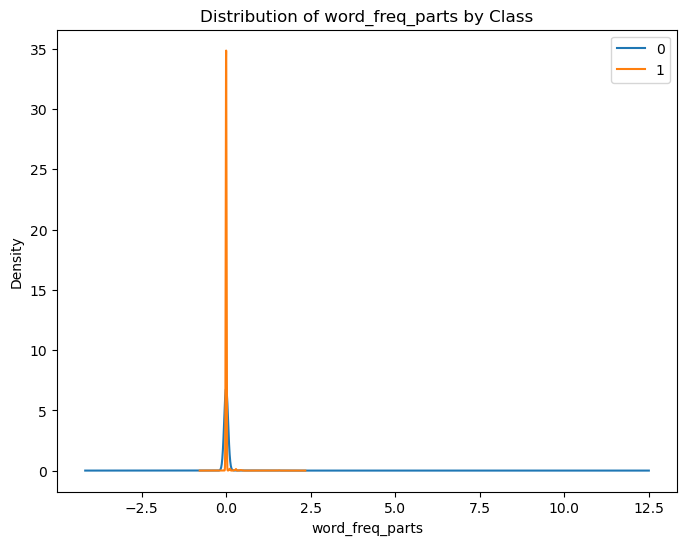

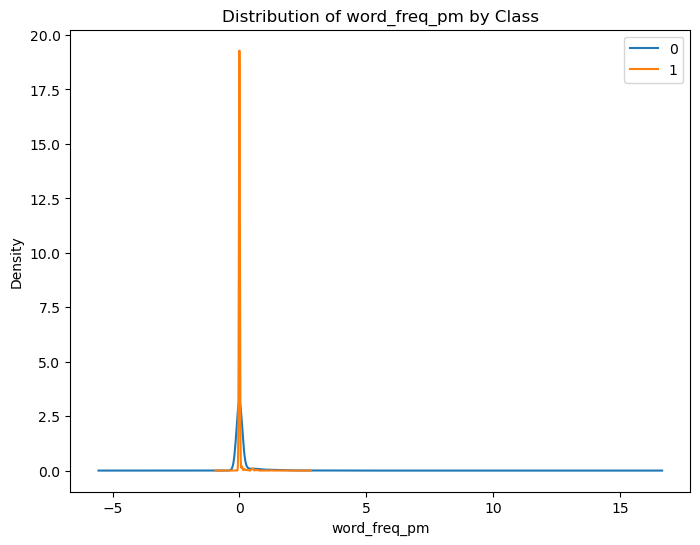

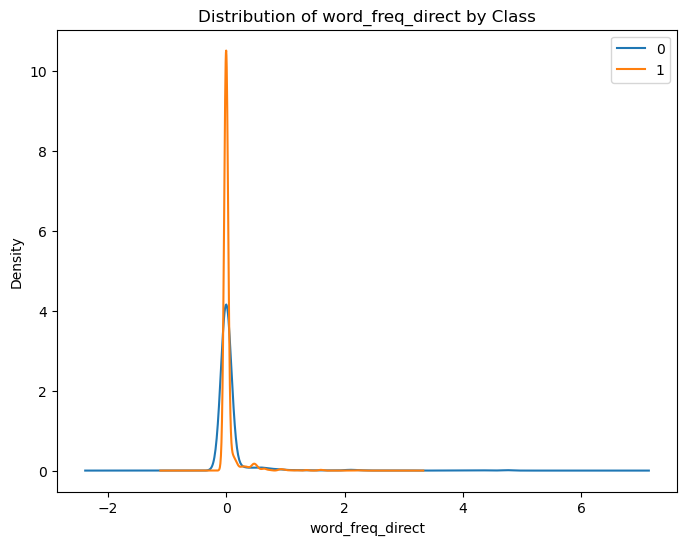

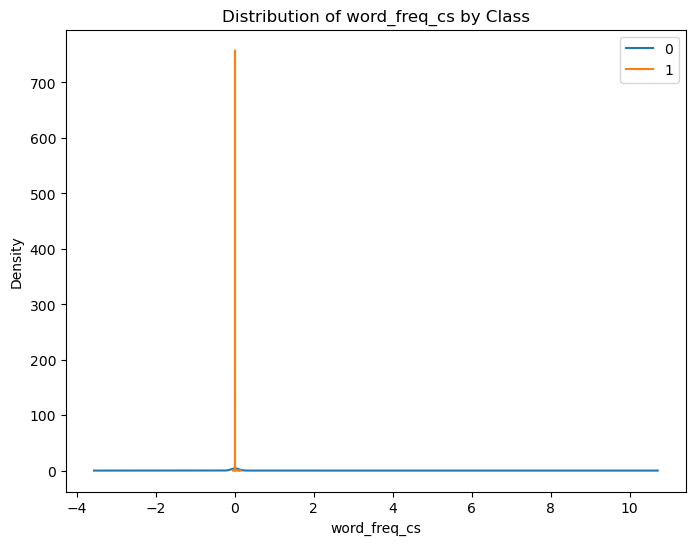

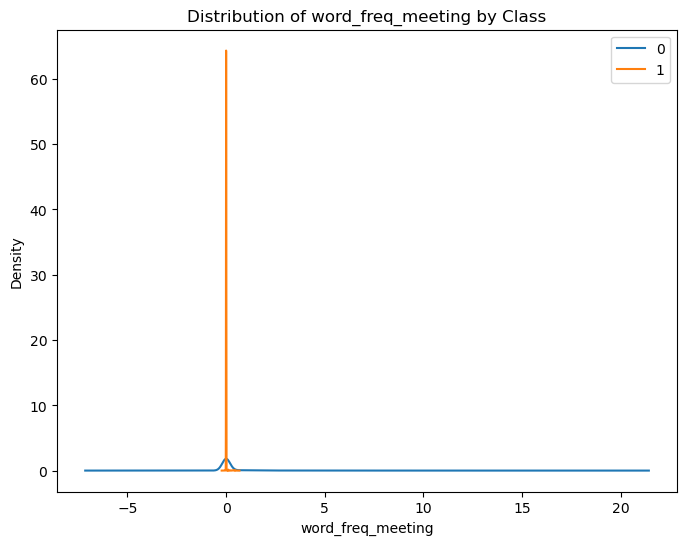

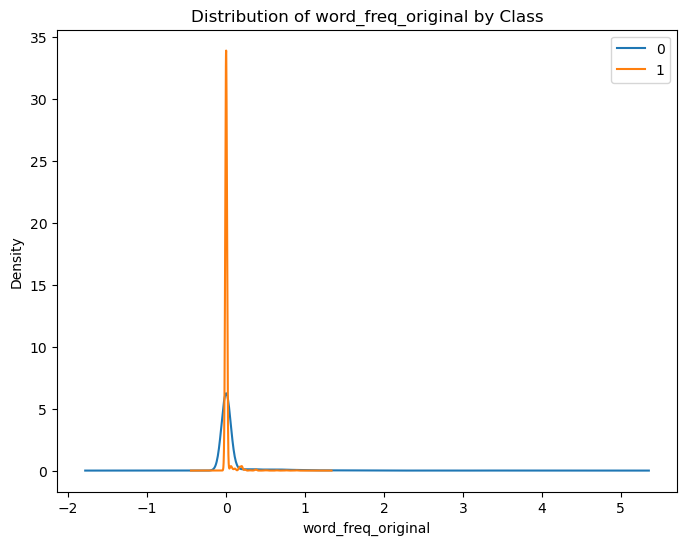

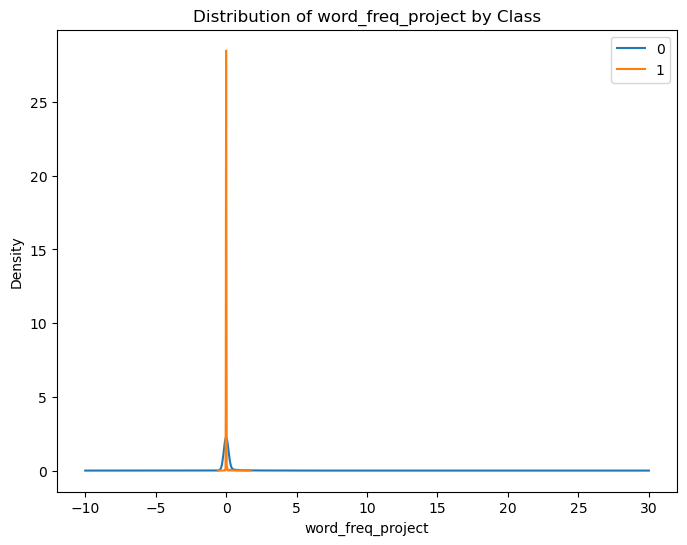

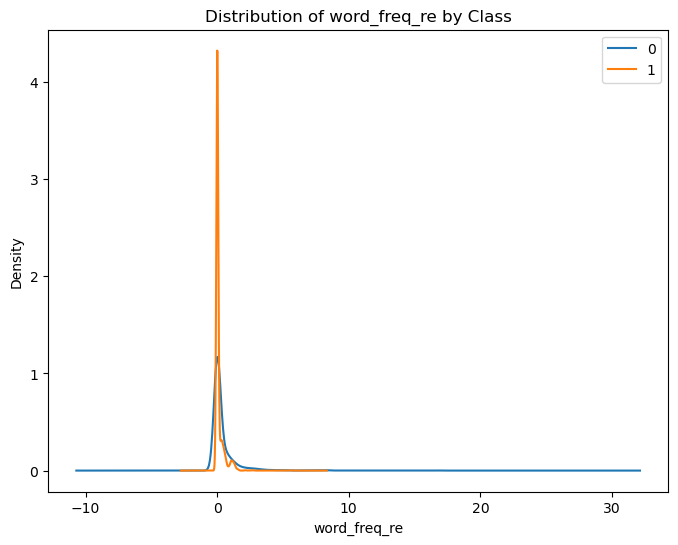

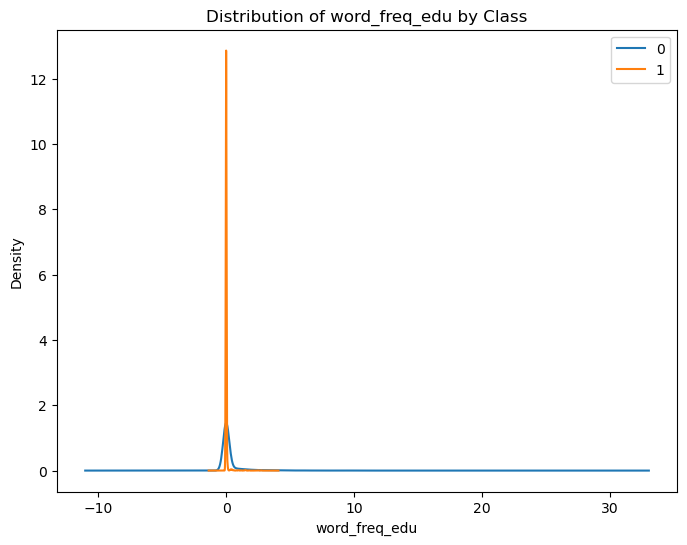

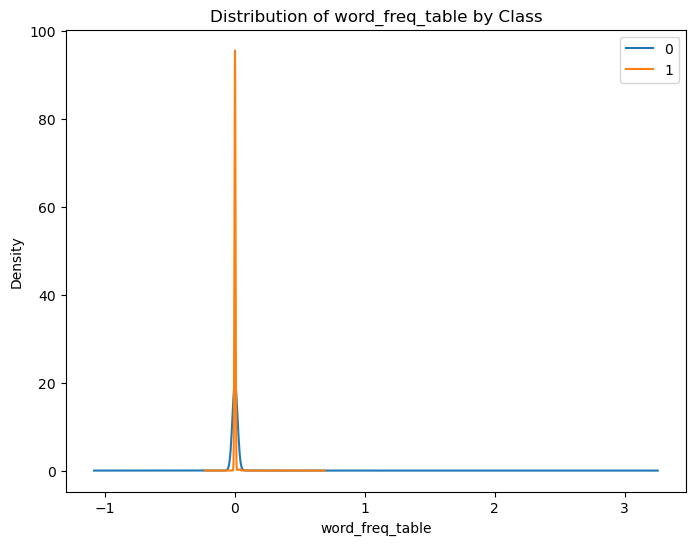

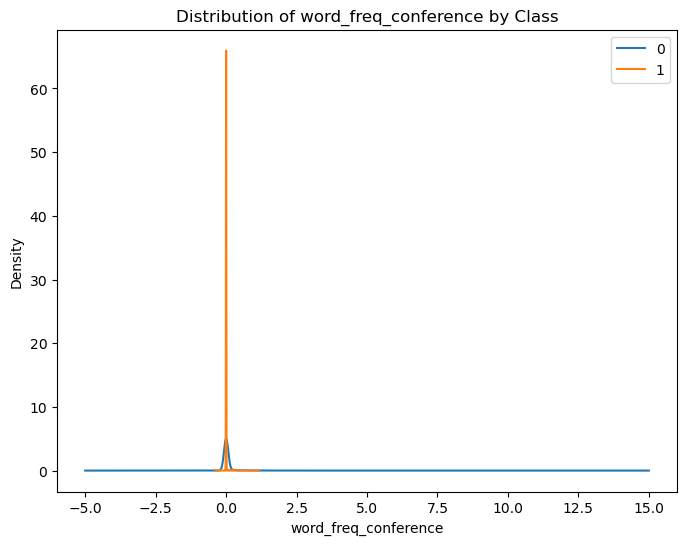

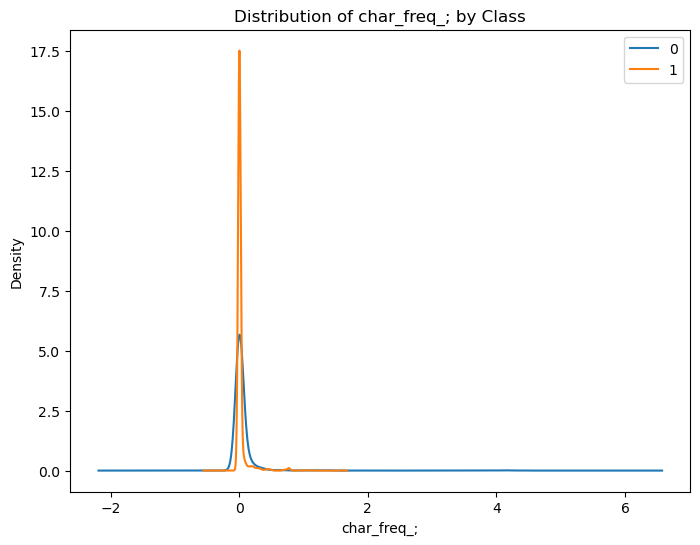

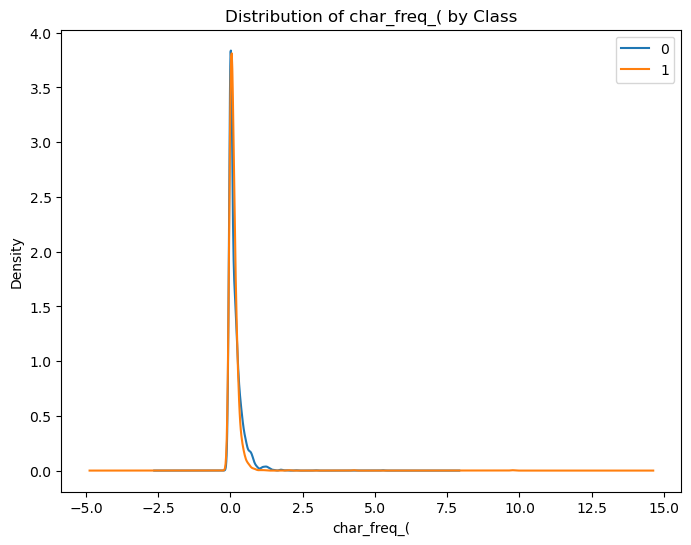

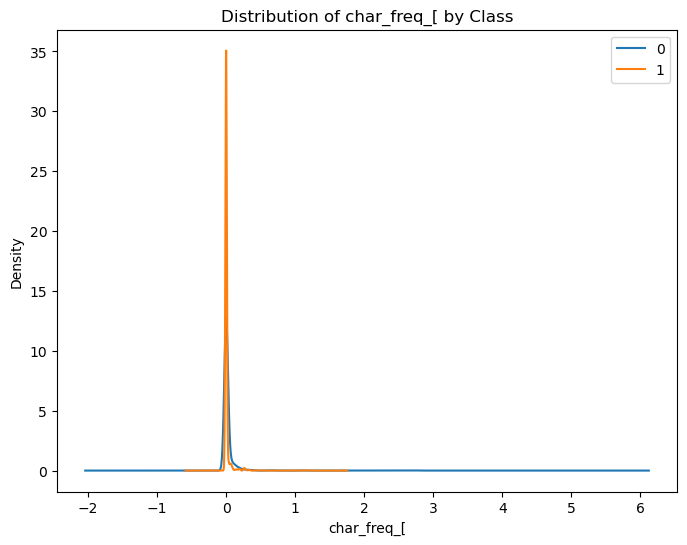

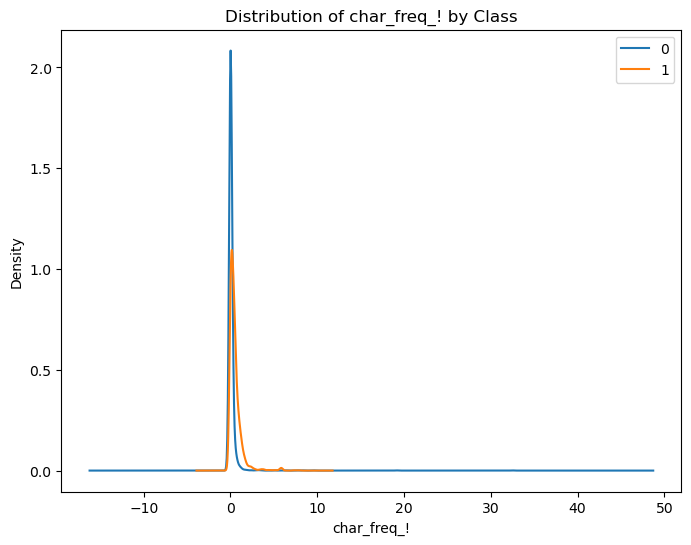

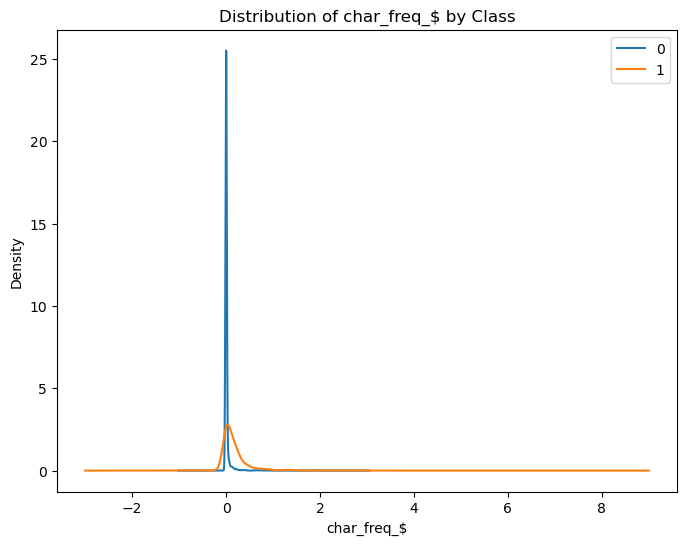

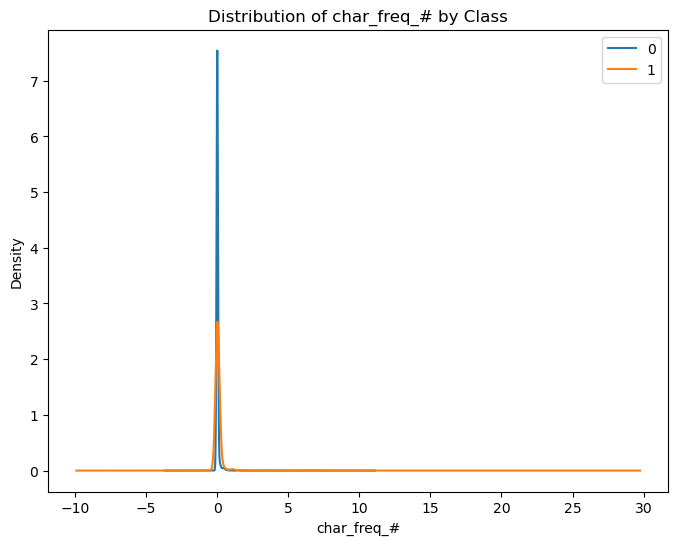

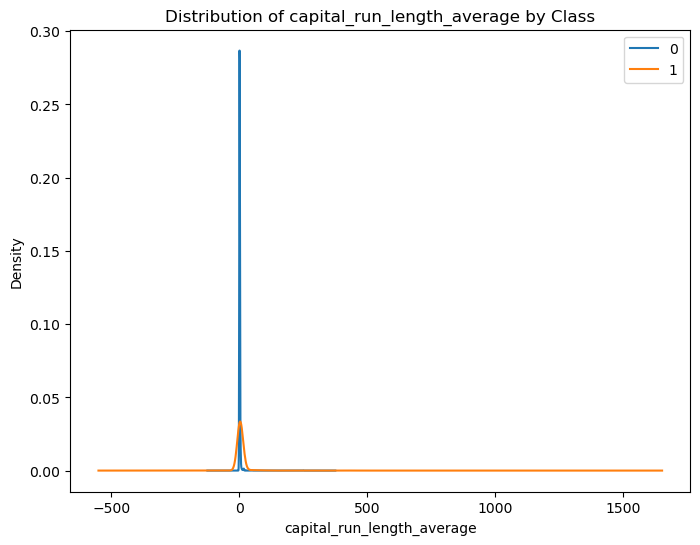

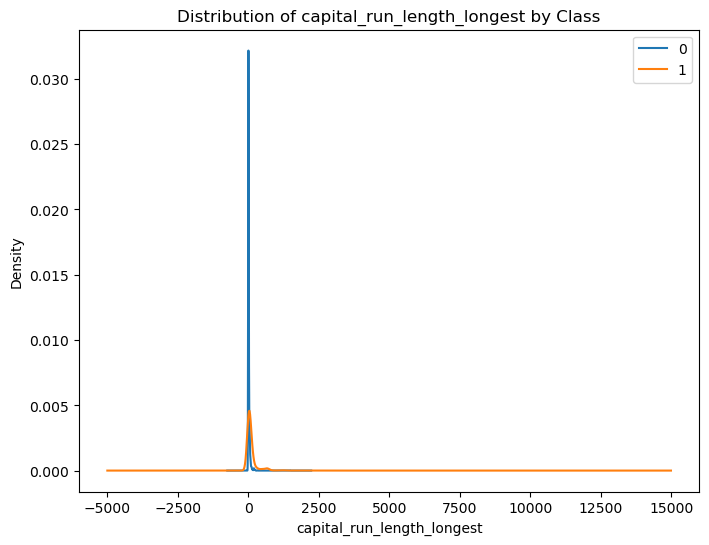

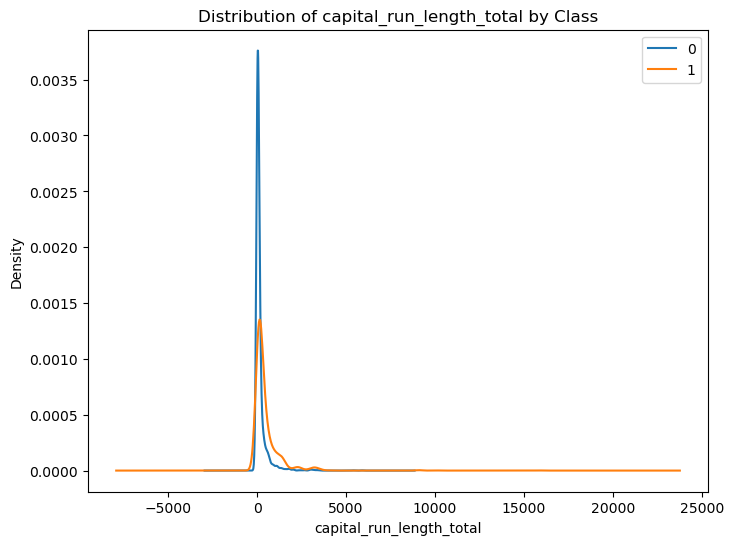

In [79]:
import matplotlib.pyplot as plt

# Group the data by the 'spam' column
grouped_data = data.groupby('spam')

# Plot histogram for each feature, grouped by class
for feature in column_names[:-1]:  # Exclude the 'spam' column
    plt.figure(figsize=(8, 6))
    for name, group in grouped_data:
        group[feature].plot(kind='density', label=name)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.show()

In [7]:
# SVM_full data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM Classifier
svm = SVC(kernel='rbf', C=40000)
svm.fit(X_train, y_train)

# Make predictions on the testing set
svm_predictions = svm.predict(X_test)

# Evaluate the classifiers
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("SVM Classifier_full:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)

SVM Classifier_full:
Accuracy: 0.9119565217391304
Precision: 0.9164420485175202
Recall: 0.8717948717948718
F1-Score: 0.8935611038107754


In [8]:
#SVM_feature dropped
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data_copy.iloc[:, :-1].values
y = data_copy.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM Classifier
svm = SVC(kernel='rbf', C=40000)
svm.fit(X_train, y_train)

# Make predictions on the testing set
svm_predictions = svm.predict(X_test)

# Evaluate the classifiers
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("SVM Classifier_feature dropped:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)

SVM Classifier_feature dropped:
Accuracy: 0.8978260869565218
Precision: 0.9204545454545454
Recall: 0.8307692307692308
F1-Score: 0.8733153638814015


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing set
nb_predictions = naive_bayes.predict(X_test)

# Evaluate the classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Print evaluation metrics
print("Naive Bayes Classifier_full:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)

Naive Bayes Classifier_full:
Accuracy: 0.8152173913043478
Precision: 0.7115384615384616
Recall: 0.9487179487179487
F1-Score: 0.8131868131868132


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data_copy.iloc[:, :-1].values
y = data_copy.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing set
nb_predictions = naive_bayes.predict(X_test)
#svm_predictions = svm.predict(X_test)

# Evaluate the classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Print evaluation metrics
print("Naive Bayes Classifier_feature dropped:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)

Naive Bayes Classifier_feature dropped:
Accuracy: 0.8630434782608696
Precision: 0.9049079754601227
Recall: 0.7564102564102564
F1-Score: 0.8240223463687152


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Create the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(naive_bayes, X, y, cv=5)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)

# Fit the classifier on the entire dataset
naive_bayes.fit(X, y)

# Make predictions on the entire dataset
predictions = naive_bayes.predict(X)

# Calculate precision, recall, and F1-score
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

print("Naive Bayes Classifier_full_cv:")
print("Mean Accuracy:", mean_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Naive Bayes Classifier_full_cv:
Mean Accuracy: 0.8254347826086956
Precision: 0.7010891488503429
Recall: 0.9591611479028698
F1-Score: 0.8100675833139129


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data_copy.iloc[:, :-1].values
y = data_copy.iloc[:, -1].values

# Create the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(naive_bayes, X, y, cv=5)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)

# Fit the classifier on the entire dataset
naive_bayes.fit(X, y)

# Make predictions on the entire dataset
predictions = naive_bayes.predict(X)

# Calculate precision, recall, and F1-score
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

print("Naive Bayes Classifier_dropped_cv:")
print("Mean Accuracy:", mean_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Naive Bayes Classifier_dropped_cv:
Mean Accuracy: 0.8660869565217391
Precision: 0.9063568010936432
Recall: 0.7317880794701986
F1-Score: 0.8097709923664123
